In [536]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [537]:
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [538]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **Linear Models**

In [539]:
models={
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(),
    "Lasso Regresion":Lasso(),
    "Elastic-Net Regression":ElasticNet(),
    "Support Vector Regressor":SVR(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Bagging Regressor": BaggingRegressor(base_estimator=LinearRegression()),
    "Extra Tree Regressor": ExtraTreesRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "GradientBoost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor()
    
}

In [540]:
#1 . OLS method

X = df[['total_bill','size']]
y = df[['tip']]

X_full = sm.add_constant(X)

### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split( X_full, y, test_size=0.2, random_state=42)
X_train.head(3)

,const,total_bill,size
228,1.0,13.28,2
208,1.0,24.27,2
96,1.0,27.28,2


In [541]:
#Assumptions Before MLR Model
# There are several assumptions of linear regression. We can check two of them before building the regression model. Let us check the following assumptions in this section:

# 1.Assumption on Dependent Variable
#2. No or little multicollinearity

In [542]:
df['tip'].dtype

dtype('float64')

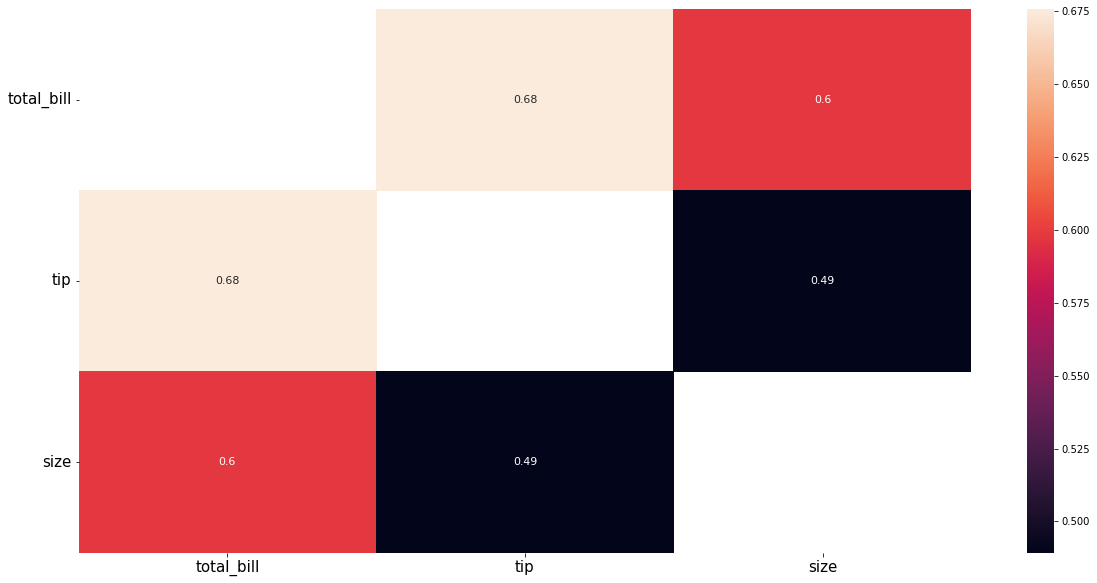

In [543]:
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df.corr()[np.abs(df.corr()) < 0.75], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [544]:
MLR_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     79.07
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           8.92e-26
Time:                        08:18:37   Log-Likelihood:                -287.23
No. Observations:                 195   AIC:                             580.5
Df Residuals:                     192   BIC:                             590.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5681      0.233      2.436      0.0

In [545]:
pred_val = MLR_full_model.predict(X_test)

In [546]:
#Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:

# 1.Linear Relationship Between Dependent and Independent Variable
# 2.Autocorrelation
# 3.Heteroscedasticity
# 4.Tests of Normality

In [547]:
#Heteroskedasticity

#Ho: There is homoscedasticity present in the data

#H1: There is a heteroscedasticity present in the data

# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_full_model.resid, MLR_full_model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
k =lzip(name, test[2:])



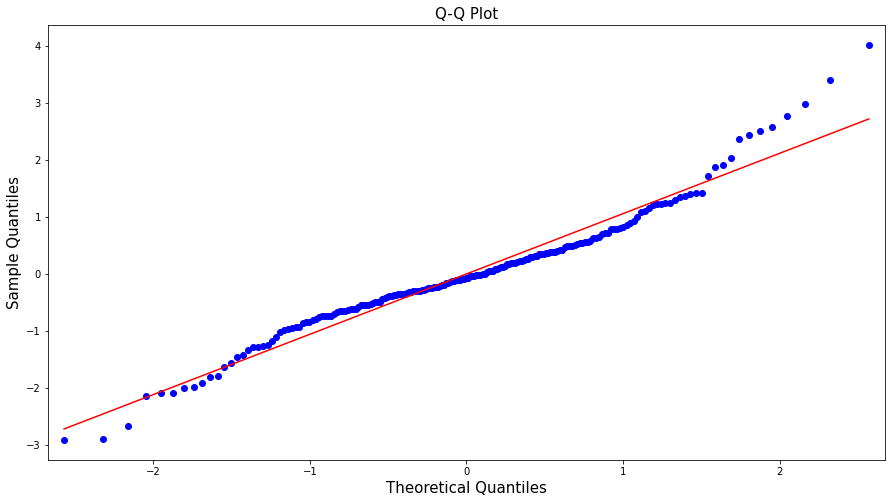

In [548]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_full_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [549]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'

#The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:

#Ho: Residuals are normally distributed

#H1: Residuals are not normally distributed

stat, p_value = shapiro(MLR_full_model.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
print('--------------')

if p_value < 0.05:
  print('Residuals are not normally distributed')
else:
  print('Residuals are normally distributed')

Test statistic: 0.9647018313407898
P-Value: 8.266983786597848e-05
--------------
Residuals are not normally distributed


In [550]:
## 1. sklearn linear model


In [551]:
X = df[['total_bill','size']]
y = df['tip']

In [552]:
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train.head(3)

,total_bill,size
228,13.28,2
208,24.27,2
96,27.28,2


In [553]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [554]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [555]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [556]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [557]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [558]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

In [559]:

# 1. Linear model

# initiate linear regression model
linreg = LinearRegression()

MLR_model = linreg.fit(X_train, y_train)

MLR_model.score(X_train, y_train)

0.4516422761023764

In [560]:

print('RMSE on train set: ', get_train_rmse(MLR_model))


print('RMSE on test set: ', get_test_rmse(MLR_model))

difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  1.0555
RMSE on test set:  0.8054
Difference between RMSE on train and test set:  0.2501000000000001


In [561]:

update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.44593,0.8054,27.978917


In [562]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

In [563]:

sgd = SGDRegressor(random_state = 10)


linreg_with_SGD = sgd.fit(X_train, y_train)


print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 1.0669
RMSE on test set: 0.8141


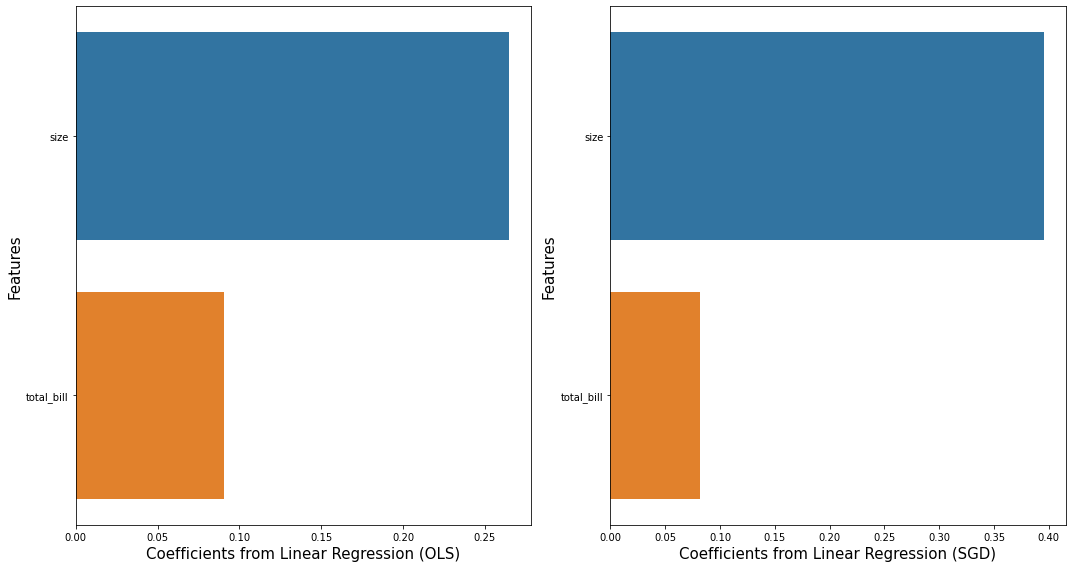

In [564]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [565]:

update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.445930,0.8054,27.978917
1,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057


In [566]:

ridge = Ridge(alpha = 1, max_iter = 500)


ridge.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.8048


In [567]:

update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)
score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.445930,0.8054,27.978917
1,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
2,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222


In [568]:

ridge = Ridge(alpha = 2, max_iter = 500)

ridge.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.8042


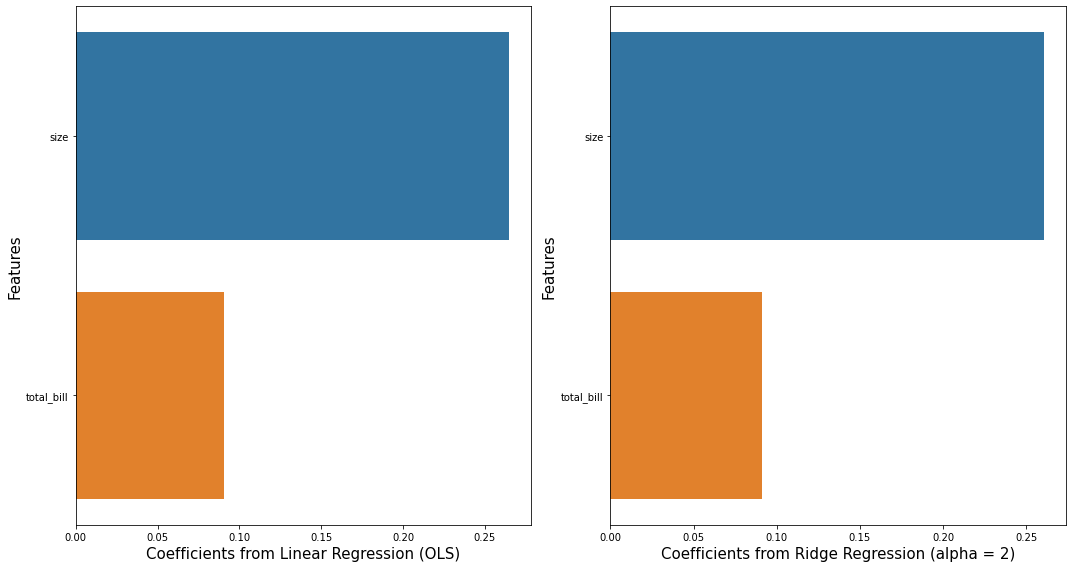

In [569]:

plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 2)')


plt.tight_layout()


plt.show()

In [570]:

update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')
score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.445930,0.8054,27.978917
1,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
2,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
3,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806


In [571]:

lasso = Lasso(alpha = 0.01, max_iter = 500)

lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.801


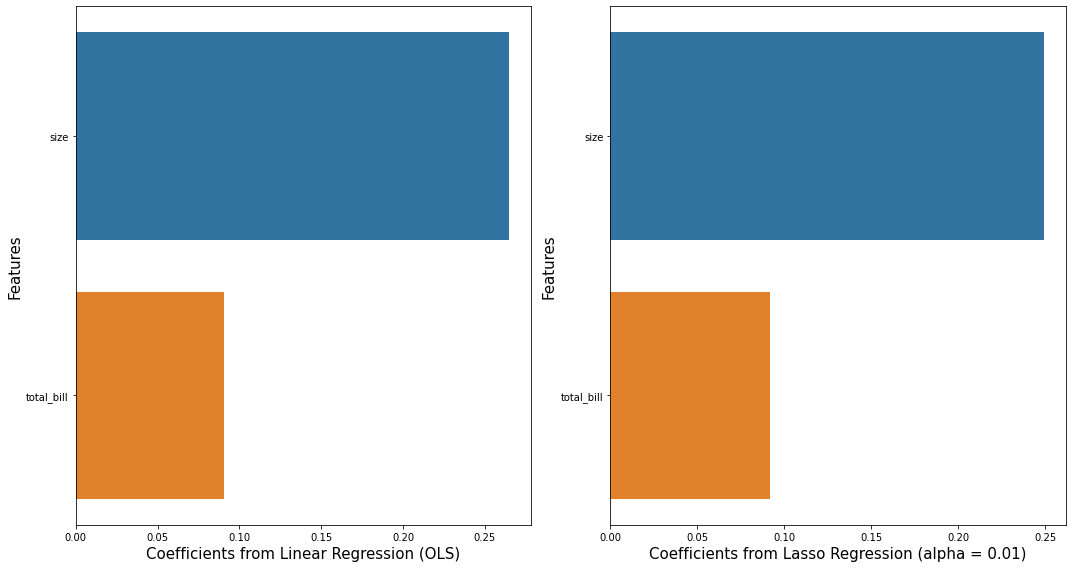

In [572]:

plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

plt.tight_layout()

plt.show()

In [573]:
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


[]

In [574]:

update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.445930,0.8054,27.978917
1,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
2,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
3,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667


In [575]:

enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

enet.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.7953


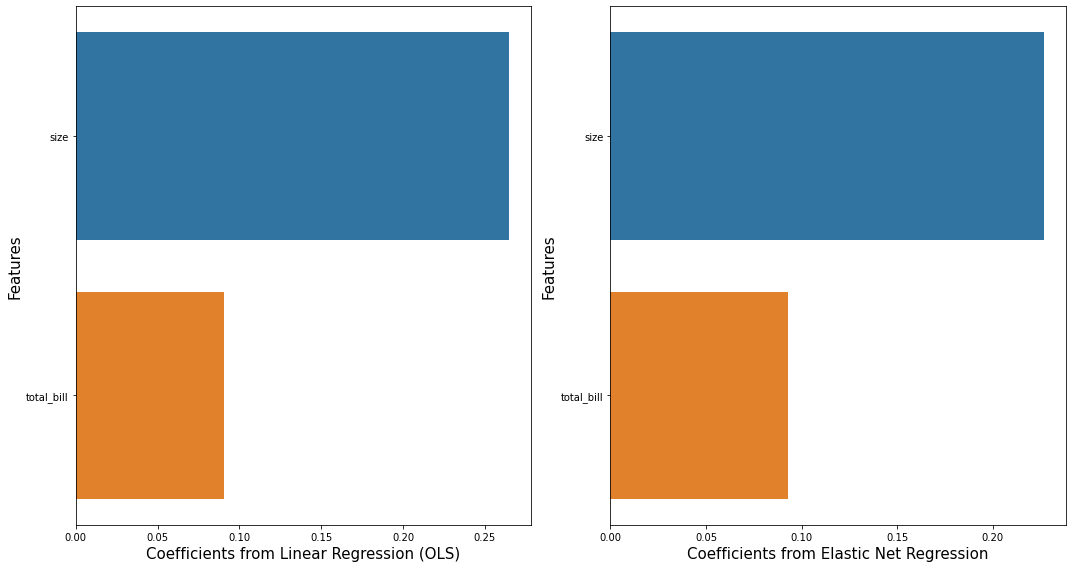

In [576]:

plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

plt.tight_layout()

plt.show()

In [577]:

update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.445930,0.8054,27.978917
1,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
2,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
3,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257


In [578]:

tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

ridge_grid.fit(X_train, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 100} 

RMSE on test set: 0.7764


In [579]:

update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))
score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.445930,0.8054,27.978917
1,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
2,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
3,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
6,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669


In [580]:

tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
lasso = Lasso()

lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

lasso_grid.fit(X_train, y_train)
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1} 

RMSE on test set: 0.7527


In [581]:

update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))
score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.445930,0.8054,27.978917
1,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
2,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
3,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
6,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
7,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099


In [582]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]
enet = ElasticNet()

enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 10, 'l1_ratio': 0.0001} 

RMSE on test set: 0.7542


In [583]:

update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))
score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,0.451642,0.445930,0.8054,27.978917
1,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
2,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
3,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
6,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
7,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
8,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800


,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.752700,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.754200,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.776400,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.795300,27.710257
4,Lasso Regression,0.451569,0.445856,0.801000,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.804200,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.804800,27.963222
7,Linear Regression,0.451642,0.445930,0.805400,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.814100,27.052057


In [585]:



# initiate linear regression model
SVM_reg = SVR()
SVR_model = SVM_reg.fit(X_train, y_train)

SVR_model.score(X_train, y_train)

0.4233101357757023

In [586]:

print('RMSE on train set: ', get_train_rmse(SVR_model))


print('RMSE on test set: ', get_test_rmse(SVR_model))

difference = abs(get_test_rmse(SVR_model) - get_train_rmse(SVR_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  1.0824
RMSE on test set:  0.7313
Difference between RMSE on train and test set:  0.3511000000000001


In [587]:

update_score_card(algorithm_name = 'SVR Regression', model = SVR_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [588]:
tuned_paramaters = [{'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} ]

# initiate the elastic net regression model  
svr_cv = SVR()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
svr_grid = GridSearchCV(estimator = svr_cv, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
svr_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', svr_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(svr_grid))

Best parameters for Elastic Net Regression:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 

RMSE on test set: 0.8006


In [589]:
update_score_card(algorithm_name = 'SVR Regression with (using GridseachCV)', model = svr_grid)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [590]:
# Decision Tree 

DT_reg = DecisionTreeRegressor()
DT_model = DT_reg.fit(X_train, y_train)
DT_model.score(X_train, y_train)

0.9929662125691125

In [591]:

print('RMSE on train set: ', get_train_rmse(DT_model))


print('RMSE on test set: ', get_test_rmse(DT_model))

difference = abs(get_test_rmse(DT_model) - get_train_rmse(DT_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.1195
RMSE on test set:  1.007
Difference between RMSE on train and test set:  0.8875


In [592]:

update_score_card(algorithm_name = 'Decision tree Regression', model = DT_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [593]:
tuned_paramaters = [{'criterion': ['mse'], 
                     'max_depth': range(2, 3),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,5),
                     'min_samples_leaf': range(1,5),
                     'max_leaf_nodes': range(2, 3)}]

# initiate the elastic net regression model  
DT_cv = DecisionTreeRegressor()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
DT_grid = GridSearchCV(estimator = DT_cv, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
DT_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Decision tree Regression: ', DT_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(DT_grid))

Best parameters for Decision tree Regression:  {'criterion': 'mse', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2} 

RMSE on test set: 0.9625


In [594]:
update_score_card(algorithm_name = 'Decision tree Regression with (using GridseachCV)', model = DT_grid)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [595]:
# Random forest Regressor



In [596]:


RF_reg = RandomForestRegressor()
RF_model = RF_reg.fit(X_train, y_train)
RF_model.score(X_train, y_train)

0.8836885536337363

In [597]:

print('RMSE on train set: ', get_train_rmse(RF_model))


print('RMSE on test set: ', get_test_rmse(RF_model))

difference = abs(get_test_rmse(RF_model) - get_train_rmse(RF_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.4861
RMSE on test set:  0.9034
Difference between RMSE on train and test set:  0.4173


In [598]:

update_score_card(algorithm_name = 'Random forest Regression', model = RF_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [599]:
tuned_paramaters = [{'criterion': ['mse'],
                     'n_estimators': [10, 30, ],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5,],
                     'min_samples_leaf': [1, 5],
                     'max_leaf_nodes': [2, 5]}]

# initiate the elastic net regression model  
RF_cv = RandomForestRegressor()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
RF_grid = GridSearchCV(estimator = RF_cv, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train and y_train using fit()
RF_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Decision tree Regression: ', RF_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(RF_grid))

Best parameters for Decision tree Regression:  {'criterion': 'mse', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10} 

RMSE on test set: 0.936


In [600]:
update_score_card(algorithm_name = 'Random forest Regression with (using GridseachCV)', model = RF_grid)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [601]:
# ada boost

In [602]:


ADA_reg = AdaBoostRegressor()
ADA_model = ADA_reg.fit(X_train, y_train)
ADA_model.score(X_train, y_train)

0.5974364263387407

In [603]:

print('RMSE on train set: ', get_train_rmse(ADA_model))


print('RMSE on test set: ', get_test_rmse(ADA_model))

difference = abs(get_test_rmse(ADA_model) - get_train_rmse(ADA_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.9044
RMSE on test set:  0.877
Difference between RMSE on train and test set:  0.02739999999999998


In [604]:

update_score_card(algorithm_name = 'Adaboost  Regression', model = ADA_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [605]:
# gradient boosting

In [606]:


GBR_reg = GradientBoostingRegressor()
GBR_model = GBR_reg.fit(X_train, y_train)
GBR_model.score(X_train, y_train)

0.8388740439598321

In [607]:

print('RMSE on train set: ', get_train_rmse(GBR_model))


print('RMSE on test set: ', get_test_rmse(GBR_model))

difference = abs(get_test_rmse(GBR_model) - get_train_rmse(GBR_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.5722
RMSE on test set:  0.8954
Difference between RMSE on train and test set:  0.32319999999999993


In [608]:

update_score_card(algorithm_name = 'Gradient boosting  Regression', model = GBR_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [609]:
# XGBOOST regression

In [610]:


XGB_reg = XGBRegressor()
XGB_model = XGB_reg.fit(X_train, y_train)
XGB_model.score(X_train, y_train)

[08:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7683888135393585

In [611]:

print('RMSE on train set: ', get_train_rmse(XGB_model))


print('RMSE on test set: ', get_test_rmse(XGB_model))

difference = abs(get_test_rmse(XGB_model) - get_train_rmse(XGB_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.686
RMSE on test set:  0.8591
Difference between RMSE on train and test set:  0.17309999999999992


In [612]:

update_score_card(algorithm_name = 'XG boosting  Regression', model = XGB_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [613]:
#BaggingRegressor

In [614]:


BAG_reg = BaggingRegressor(base_estimator=LinearRegression())
BAG_model = BAG_reg.fit(X_train, y_train)
BAG_model.score(X_train, y_train)

0.45051170305468446

In [615]:

print('RMSE on train set: ', get_train_rmse(BAG_model))


print('RMSE on test set: ', get_test_rmse(BAG_model))

difference = abs(get_test_rmse(BAG_model) - get_train_rmse(BAG_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  1.0566
RMSE on test set:  0.8163
Difference between RMSE on train and test set:  0.24029999999999996


In [616]:

update_score_card(algorithm_name = 'XG boosting  Regression', model = BAG_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [617]:
#ExtraTreesRegressor

In [619]:


EXTRA_reg = ExtraTreesRegressor()
EXTRA_model = EXTRA_reg.fit(X_train, y_train)
EXTRA_model.score(X_train, y_train)

0.992964490157795

In [620]:

print('RMSE on train set: ', get_train_rmse(EXTRA_model))


print('RMSE on test set: ', get_test_rmse(EXTRA_model))

difference = abs(get_test_rmse(EXTRA_model) - get_train_rmse(EXTRA_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.1196
RMSE on test set:  0.8968
Difference between RMSE on train and test set:  0.7772


In [621]:

update_score_card(algorithm_name = 'XG boosting  Regression', model = EXTRA_model)

score_card

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.7527,28.166099
1,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.7542,28.146800
2,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.7764,27.251669
3,Elastic Net Regression,0.451213,0.445496,0.7953,27.710257
4,Lasso Regression,0.451569,0.445856,0.8010,27.876667
5,Ridge Regression (with alpha = 2),0.451637,0.445925,0.8042,27.947806
6,Ridge Regression (with alpha = 1),0.451641,0.445929,0.8048,27.963222
7,Linear Regression,0.451642,0.445930,0.8054,27.978917
8,Linear Regression (using SGD),0.439765,0.433929,0.8141,27.052057
9,SVR Regression,0.423310,0.417303,0.7313,24.075265


In [624]:

score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)
score_card.style.highlight_min(color = 'red', subset = 'Test_RMSE')

,Model_Name,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,SVR Regression,0.423310,0.417303,0.731300,24.075265
1,Lasso Regression (using GridSearchCV),0.424519,0.418525,0.752700,28.166099
2,Elastic Net Regression (using GridSearchCV),0.428356,0.422401,0.754200,28.146800
3,Ridge Regression (using GridSearchCV),0.447415,0.441659,0.776400,27.251669
4,Elastic Net Regression,0.451213,0.445496,0.795300,27.710257
5,SVR Regression with (using GridseachCV),0.545603,0.540870,0.800600,23.831414
6,Lasso Regression,0.451569,0.445856,0.801000,27.876667
7,Ridge Regression (with alpha = 2),0.451637,0.445925,0.804200,27.947806
8,Ridge Regression (with alpha = 1),0.451641,0.445929,0.804800,27.963222
9,Linear Regression,0.451642,0.445930,0.805400,27.978917
